In [15]:
using TaylorIntegration, Plots, TaylorSeries, LaTeXStrings

In [2]:
@taylorize function three_body_restricted_with_momentum!(du::Vector{T}, u::Vector{T}, p, t) where T
    x, y, p_x, p_y, μ = u

    x_plus_mu = x + μ
    x_minus_one_plus_mu = x - (1 - μ)
    r1 = sqrt(x_plus_mu^2 + y^2)
    r2 = sqrt(x_minus_one_plus_mu^2 + y^2)

    r1_cubed = r1^3
    r2_cubed = r2^3

    # Ecuaciones de movimiento
    du[1] = p_x + y  
    du[2] = p_y - x  

    du[3] = -(1 - μ) * (x_plus_mu) / (r1_cubed) - ( μ * (x_minus_one_plus_mu) / r2_cubed ) + p_y  
    du[4] = -(1 - μ) * y / r1_cubed - μ * y / r2_cubed - p_x  

    du[5] = zero(μ)  # μ permanece constante
end

In [3]:
# Configuración inicial
x0, y0, vx0, vy0  = 0.4615384615877174, -0.8660254038298406, 0.8660254038298406, 0.4615384615877174
μ0 = 0.0385/2 # mu cerca de L5
initial_conditions = [x0, y0, vx0, vy0, μ0]
t0 = 0.0
tend = 100.0
step = 0.01
time_vector = t0:step:tend
order = 20
abstol = 1e-20

1.0e-20

In [4]:
d1 = taylorinteg(three_body_restricted_with_momentum!, initial_conditions, time_vector, order, abstol; maxsteps=900000)

tspan: (0.0, 100.0), x: 5 Float64 variables

In [5]:
d1.x

10001×5 transpose(::Matrix{Float64}) with eltype Float64:
 0.461538  -0.866025  0.866025  0.461538  0.01925
 0.461538  -0.866024  0.865887  0.46178   0.01925
 0.461536  -0.866021  0.865752  0.462023  0.01925
 0.461532  -0.866014  0.865618  0.462268  0.01925
 0.461528  -0.866006  0.865487  0.462514  0.01925
 0.461522  -0.865995  0.865359  0.462762  0.01925
 0.461515  -0.865981  0.865232  0.463011  0.01925
 0.461507  -0.865965  0.865108  0.463261  0.01925
 0.461498  -0.865946  0.864987  0.463514  0.01925
 0.461488  -0.865924  0.864867  0.463768  0.01925
 ⋮                                        
 0.585373  -0.770784  0.809782  0.609561  0.01925
 0.585763  -0.770544  0.809686  0.609731  0.01925
 0.586155  -0.770305  0.80959   0.609898  0.01925
 0.586549  -0.770069  0.809492  0.610063  0.01925
 0.586944  -0.769835  0.809392  0.610225  0.01925
 0.58734   -0.769603  0.809291  0.610384  0.01925
 0.587738  -0.769374  0.80919   0.610541  0.01925
 0.588136  -0.769147  0.809086  0.610695  0.01925

In [6]:
plotly()

Plots.PlotlyBackend()

In [7]:
plot(d1.x[:,1], d1.x[:,2], label="", color=:black, alpha=0.5, xlabel="x", ylabel="y")  

In [8]:
@taylorize function three_body_restricted_param!(du::Vector{T}, u::Vector{T}, p, t) where T
    x, y, v_x, v_y, μ = u

    x_plus_mu = x + μ
    x_minus_one_plus_mu = x - 1 + μ
    one_minus_mu = 1 - μ  

    r1 = sqrt(x_plus_mu^2 + y^2)
    r2 = sqrt(x_minus_one_plus_mu^2 + y^2)

    r1_cubed = r1^3
    r2_cubed = r2^3

    du[1] = v_x
    du[2] = v_y
    du[3] = (2v_y + x) - (one_minus_mu * x_plus_mu / r1_cubed + μ * x_minus_one_plus_mu / r2_cubed)
    du[4] = (-2v_x + y) - (one_minus_mu * y / r1_cubed + μ * y / r2_cubed)
    du[5] = zero(μ)
end

In [9]:


potencial(x, y, mu) = - (1-mu) / sqrt((x+mu)^2+y^2) - mu / sqrt((x-1+mu)^2+y^2)

JacH(x, y, px, py, mu) = 0.5 * (px^2+py^2) + potencial(x, y, mu) - (x*py-y*px)

JacN(x, y, vx, vy, mu) = 0.5 * (vx^2+vy^2) + potencial(x, y, mu) - 0.5 * (x^2+y^2)

JacN (generic function with 1 method)

In [10]:
JacH.(d1.x[:,1], d1.x[:,2], d1.x[:,3], d1.x[:,4], (μ0,))

10001-element Vector{Float64}:
 -1.4906956655888464
 -1.4906956655888461
 -1.4906956655888464
 -1.4906956655888464
 -1.4906956655888464
 -1.4906956655888464
 -1.4906956655888464
 -1.4906956655888464
 -1.4906956655888464
 -1.4906956655888464
  ⋮
 -1.4906956655888464
 -1.4906956655888464
 -1.4906956655888464
 -1.4906956655888464
 -1.4906956655888461
 -1.4906956655888464
 -1.4906956655888464
 -1.4906956655888464
 -1.4906956655888464

In [11]:
initial_conditions2 = [x0, y0, 0, 0, μ0]

5-element Vector{Float64}:
  0.4615384615877174
 -0.8660254038298406
  0.0
  0.0
  0.01925

In [12]:
d2 = taylorinteg(three_body_restricted_param!, initial_conditions2, time_vector, order, abstol; maxsteps=90000)

tspan: (0.0, 100.0), x: 5 Float64 variables

In [13]:
plot(d2.x[:,1], d2.x[:,2], label="", color=:black, alpha=0.5)  


In [17]:
gr()

Plots.GRBackend()

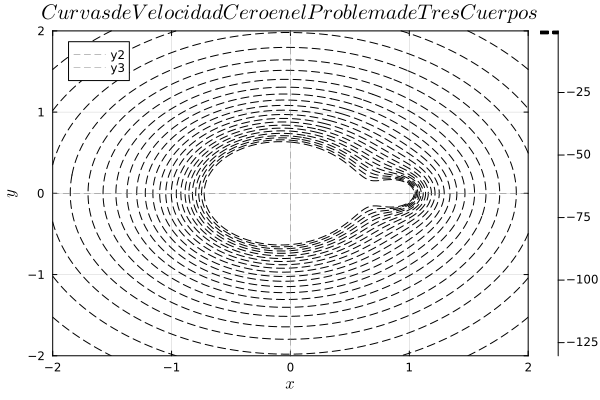

In [28]:


# Definir el parámetro de masa mu
mu = 0.1

# Definir la función de potencial U(x, y)
function U(x, y, mu)
    return -(1 - mu) / sqrt((x + mu)^2 + y^2) - mu / sqrt((x - (1 - mu))^2 + y^2)
end

# Crear un rango para x e y
x = LinRange(-2, 2, 400)
y = LinRange(-2, 2, 400)

# Crear la cuadrícula para evaluar U(x, y)
U_values = [U(xi, yi, mu) for yi in y, xi in x]

# Generar una lista de niveles J automáticamente
J_levels = [j for j in -1.5:0.05:-0.3]  # De -1.5 a -0.3, con pasos de 0.05

# Graficar las curvas de velocidad cero
contour(x, y, U_values, levels=J_levels, c=:black, linewidth=1, linestyle=:dash, xlabel=L"x", ylabel=L"y",
        title=L"Curvas de Velocidad Cero en el Problema de Tres Cuerpos",
        framestyle=:box)

# Añadir líneas de referencia en los ejes
hline!([0], lw=0.5, lc=:gray, ls=:dash)
vline!([0], lw=0.5, lc=:gray, ls=:dash)
